# ~TED TALK SHARES PREDICTION~

TED 
 1. Exploraty analysis  
         kdjflkdjlf 
 2. Linear regression 
     lkjdf 
 3. Neurual 
     lkdkjfldjf
.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
import textblob
from textblob import TextBlob
from collections import Counter
import datetime
import re
import nltk
import operator
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
import time
import h5py
import scipy
from PIL import Image
from scipy import ndimage

df = pd.read_csv('./ted_main.csv')
df3 = pd.read_csv("./transcripts.csv")

# Feature Extraction

## Date Convertion

<img src="date.png" title="Title text" />

In [22]:
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

df['published_date'] = pd.to_datetime(df['published_date'])
df['film_date'] = pd.to_datetime(df['film_date'])

temp = datetime.date(2018,1,1)
temp = pd.to_datetime(temp)
df['published_date'] = temp - df['published_date']
df['film_date'] = temp - df['film_date']

df['published_date'] = df['published_date'].dt.days
df['film_date'] = df['film_date'].dt.days

## Top 35 Tags extraction

<img src="tags.png" title="Title text" />

In [23]:
df2 = df['tags']
temp = {}
for each in df2.values:
    list = each.split()
    for every in list:
        test = re.sub('[^A-Za-z0-9]+', ' ', every)
        test = test.lower()
        if test in temp.keys():
            temp[test] +=  1
        else:
            temp[test]= 1
            
new = pd.DataFrame.from_dict(temp, orient="index")
#print(new.sort_values(by = 0, ascending=False).head(15))
topTags = new.sort_values(by = 0, ascending=False).head(35).index
newtopTags = []
for i in topTags:
    newtopTags.append(i.strip())
#print(newtopTags)
xx = pd.DataFrame(0, index=np.arange(len(df)), columns=newtopTags)
#print(xx.shape)
for i in range(len(df)):
    for j in topTags:
        j = str(j).strip()
        if str(j) in str(df['tags'][i]).lower():
            xx[str(j)][i] = 1
frames = [df, xx]
result = pd.concat(frames, axis=1)
print(result.shape)

(2550, 52)


## Sentiment Polarity Extraction - NLP

<img src="transcript.png"  title="Title text" />

In [28]:
polarity = []
subj = []
for t in df3['transcript']:
    tx = TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)
df3['polarity'] = polarity
df3['subjectivity'] = subj
result = result.merge(df3,on = 'url', how='inner')
print(result.shape)

(2467, 55)


## Ratings Feature Extraction

<img src="rating.png" title="Title text" />

In [35]:
result['ratings'] = result['ratings'].apply(lambda x: eval(str(x)))
json_data = result['ratings'] # your list with json objects (dicts)
newRatings = ['Funny','Beautiful','Ingenious','Courageous','Longwinded','Confusing','Informative','Fascinating','Unconvincing','Persuasive','Jaw-dropping','OK','Obnoxious','Inspiring']
yy = pd.DataFrame(0, index=np.arange(len(result)), columns=newRatings)
ind = 0
for i in json_data:
    for j in i:
        temp = j['name']
        yy[temp][ind] = j['count']
    ind +=1

#print(result.shape)
#print(yy.shape)
frame1 = [result, yy]
result = pd.concat(frame1, axis=1)
print(result.shape)

(2467, 69)


## Description & Title Sujectivity Feature Extraction

<img src="title.png" title="Title text" />

In [38]:
tem1 = []
tem2 = []
tem3 = result['description']
#print(type(tem3))
for i in tem3:
    tem = TextBlob(i)
    tem1.append(tem.sentiment.subjectivity) 
    tem2.append(tem.sentiment.polarity)
    
result['des_subj'] = tem1
result['des_sent'] = tem2
result.columns
print(result.shape)

tem1 = []
tem2 = []
tem3 = result['title']
#print(type(tem3))
for i in tem3:
    tem = TextBlob(i)
    tem1.append(tem.sentiment.subjectivity) 
    tem2.append(tem.sentiment.polarity)
    
result['tit_subj'] = tem1
result['tit_sent'] = tem2
result.columns
print(result.shape)

(2467, 71)
(2467, 73)


## Speaker Occupcation Feature Extraction

<img src="speak.png" title="Title text" />

In [42]:
li = result['speaker_occupation']
lli=[]
lis = []
for i in li:
    if type(i) == str:
        k = i.lower().replace('/',',').replace(';',',').split(',')
        lis.append(k)
        for j in k:
            lli.append(j.strip().lower())
    else:
        lis.append([])
        pass
lid = Counter(lli)

authdf = pd.DataFrame.from_dict(lid, orient="index").sort_values(by=0, ascending=False).head(10).index
newauth = pd.DataFrame(0, index=np.arange(len(result)), columns=authdf)
for i in range(len(result)):
    for j in authdf:
        if str(j) in lis[i]:
            newauth[str(j)][i] = 1
        
frames3 = [result, newauth]
result = pd.concat(frames3, axis=1)
print(result.shape)

(2467, 83)


In [8]:
xyz = result.describe().reset_index()
print(xyz.columns)

Index(['index', 'comments', 'duration', 'film_date', 'languages',
       'num_speaker', 'published_date', 'views', 'technology', 'science',
       'global', 'issues', 'culture', 'tedx', 'design', 'business', 'change',
       'entertainment', 'social', 'ted', 'health', 'innovation', 'society',
       'art', 'future', 'communication', 'biology', 'creativity', 'humanity',
       'collaboration', 'environment', 'economics', 'medicine', 'brain',
       'activism', 'education', 'community', 'history', 'fellows', 'children',
       'music', 'invention', 'care', 'polarity', 'subjectivity', 'Funny',
       'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing',
       'Informative', 'Fascinating', 'Unconvincing', 'Persuasive',
       'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring', 'des_subj', 'des_sent',
       'tit_subj', 'tit_sent', 'writer', 'author', 'designer', 'artist',
       'entrepreneur', 'inventor', 'activist', 'journalist', 'educator',
       'psychologist'],
      dtype=

(array([  2.35900000e+03,   7.30000000e+01,   1.40000000e+01,
          1.10000000e+01,   6.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([   155895. ,   4863016.5,   9570138. ,  14277259.5,  18984381. ,
         23691502.5,  28398624. ,  33105745.5,  37812867. ,  42519988.5,
         47227110. ]),
 <a list of 10 Patch objects>)

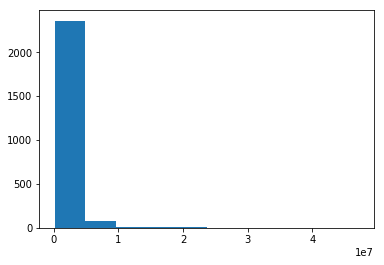

In [51]:
plt.hist((result['views']))

(array([  26.,  180.,  532.,  959.,  475.,  185.,   64.,   28.,   14.,    4.]),
 array([ 5.19283219,  5.4409681 ,  5.68910402,  5.93723994,  6.18537586,
         6.43351178,  6.6816477 ,  6.92978362,  7.17791953,  7.42605545,
         7.67419137]),
 <a list of 10 Patch objects>)

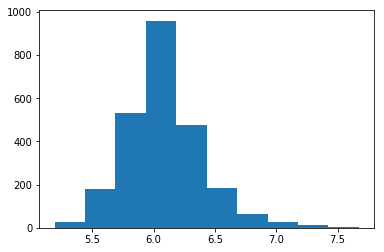

In [49]:
plt.hist(np.log10(result['views']))

# Regression Model Implementation

In [96]:
X_temp = result[[ 'comments', 'duration', 'film_date', 'languages',
       'num_speaker', 'published_date', 'views', 'technology', 'science',
       'global', 'issues', 'culture', 'tedx', 'design', 'business', 'change',
       'entertainment', 'social', 'ted', 'health', 'innovation', 'society',
       'art', 'future', 'communication', 'biology', 'creativity', 'humanity',
       'collaboration', 'environment', 'economics', 'medicine', 'brain',
       'activism', 'education', 'community', 'history', 'fellows', 'children',
       'music', 'invention', 'care', 'polarity', 'subjectivity', 'des_subj', 'des_sent',
       'tit_subj', 'tit_sent', 'writer', 'author', 'designer', 'artist',
       'entrepreneur', 'inventor', 'activist', 'journalist', 'educator',
       'psychologist']]
y = np.log10(result['views'])

mu = X_temp.mean(axis=0)
stdv = X_temp.std(axis = 0)
X = (X_temp - mu)/stdv
#X['views'] = y

## Regression Result on Training Set:

In [101]:
print("Training Data Summary")
print("=======================")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=324)
Lreg = linear_model.LinearRegression(normalize=True)
Lreg.fit(X_train, y_train)
predicted = Lreg.predict(X_train)
temp1 = Lreg.score(X_train,y_train)
print("Linear Regression Score on Training Data: {}% \n".format(temp1*100))

print("Ridge Regression Scores on Training:")
print("====================================")
li = [0,0.1,0.5,5]
regli = []
for i in li:
    Rreg = linear_model.Ridge(normalize = True, alpha = i)
    Rreg.fit(X_train, y_train)
    regli.append(Rreg)
    predicted1 = Lreg.predict(X_train)
    temp2 = Rreg.score(X_train,y_train)
    print("Score with Alpha {} is {}%".format(i,temp2*100))
    #print(temp2*100)


Training Data Summary
Linear Regression Score on Training Data: 71.73723908183266% 

Ridge Regression Scores on Training:
Score with Alpha 0 is 71.73723908183266%
Score with Alpha 0.1 is 71.17890503354356%
Score with Alpha 0.5 is 66.16914668395114%
Score with Alpha 5 is 31.432496013009036%


## Regression Result on Testing Set:

In [102]:
print("Testing Data Summary")
print("====================")
predicted2 = Lreg.predict(X_test)
temp4 = Lreg.score(X_test,y_test)
print("Linear Regression Score on testing Data is {}% \n".format(temp4*100))
#print(metrics.r2_score(predicted1, y_test)*100)

print("Ridge Regression Scores on Testing:")
print("===================================")
for j in range(4):
    predicted2 = regli[j].predict(X_test)
    temp3 = regli[j].score(X_test,y_test)
    print("Score with Alpha {} is {}%".format(li[j],temp3*100))

Testing Data Summary
Linear Regression Score on testing Data is 69.27500503091655% 

Ridge Regression Scores on Testing:
Score with Alpha 0 is 69.27500503091655%
Score with Alpha 0.1 is 68.96255931822965%
Score with Alpha 0.5 is 64.94461970294189%
Score with Alpha 5 is 30.84202870867153%


In [55]:
### Writing to csv file for Neural Network

X.to_csv("./new1.csv")
y.to_csv("./new2.csv")

# Deep Neural Network for Regression

## 3 layers with (100,50,1) hidden units are designed with following options

  **1 ** ) **Hyper Paremters Initialization**
                 - HE Initialization
  **2 ** ) **Forward Propogation**
                 - L layers use Relu activation function
  **3 ** ) **Regulariztion**
                 - lambda with L2 regularization
  **4 ** )  **Cost**
                 - MSE
  **5 ** ) **Optimization**
                 - Gradient Descent Algorithm
                 
### Algorithm Steps:
                 
##### Forward propogration ---> calculate cost ---> Backward Propogation ---> Gradient Derivative --> Update Prameter for n iterations
.

In [3]:
Xpd = pd.read_table("./new1.csv", index_col=0, sep=',')
ypd = pd.read_table("./new2.csv", index_col=0, sep=',', header=None)
X_el = np.matrix(Xpd)
Y_el = np.matrix(ypd)
X, X_test, Y, y_test = train_test_split(X_el, Y_el, test_size=0.10, random_state=324)
X = X.T
print(Y.shape) #(m,1)
print(X.shape) #(n,m)

(2220, 1)
(58, 2220)


# Hyper Parameter (W, b) Initialization

**HE Initiallization ** : This function is similar to the previous `initialize_parameters_random(...)`. The only difference is that instead of multiplying `np.random.randn(..,..)` by 10, you will multiply it by $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$, which is what He initialization recommends for layers with a ReLU activation. 

In [4]:
def initialize_parameters_deep(layers_dims,initialization="he"):

    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    

    for l in range(1, L):
        
        if initialization == "zeros":
            parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
            parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        elif initialization == "random":
            parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * 0.01
            parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        elif initialization == "he":
            parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * np.sqrt(2/layers_dims[l-1])
            parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        
        assert(parameters['W' + str(l)].shape == (layers_dims[l], layers_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layers_dims[l], 1))

        
    return parameters

# Foward Propogation

.

In [5]:
def sigmoid(z):

    s = 1/(1+np.exp(-z))
    return s,z

def relu(z):
    s = (abs(z) + z) / 2
    return s,z

In [6]:
def linear_forward(A, W, b):

    Z = np.dot(W,A) + b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [7]:
def linear_activation_forward(A_prev, W, b, activation):

    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev,W,b)
        #Z = np.dot(W,A_prev) + b
        A, activation_cache = sigmoid(Z)
        #print("sigmoid")
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev,W,b)
        #Z = np.dot(W,A_prev) + b
        A, activation_cache = relu(Z)
        #print("relu")
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [8]:
def L_model_forward(X, parameters,keep_prob=1):


    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        #print(A_prev.shape)
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)] ,parameters['b' + str(l)], "relu")
        D = np.random.rand(A.shape[0],A.shape[1])
        D = D < keep_prob
        A = np.multiply(A,D )
        A = A/keep_prob
        cache = cache + (D,)
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A,parameters['W' + str(L)] ,parameters['b' + str(L)],"relu" )
    caches.append(cache)
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

# Cost Computation 
## L2 Regularization

The standard way to avoid overfitting is called **L2 regularization**. It consists of appropriately modifying your cost function, from:
$$J = \frac{1}{2m} \sum\limits_{i = 1}^{m} \left(y^{(i)}- a^{[L](i)}\right)^{2} \tag{1}$$
To:
$$J_{regularized} = \small \underbrace{\frac{1}{2m} \sum\limits_{i = 1}^{m} \left(y^{(i)}- a^{[L](i)}\right)^{2} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$


In [9]:
def compute_cost(AL, Y,parameters,lambd,regularized=False):

    m = Y.shape[1]
    cross_entropy_cost = (1/(2*m))* np.sum(np.square(AL - Y))
    loop_len = len(parameters)//2
    
    if regularized == True:
        temp = 0
        for i in range(1,loop_len+1):
            temp += np.sum(np.square(parameters['W' + str(i)]))
        L2_regularization_cost = (1/m) * (lambd/2) * temp
        cost = cross_entropy_cost + L2_regularization_cost
    else:
        cost = cross_entropy_cost

    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost

## Back Propogation

.

In [10]:
def linear_backward(dZ, cache,D,lambd,keep_prob,val):

    #linear_cache, activation_cache,D = cache

    linear_cache, activation_cache, dummy= cache
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]
    dA_prev = np.dot(W.T, dZ)
    if val ==0:
        dZ_prev = None
    else:
        dA_prev = np.multiply(dA_prev,D )
        dA_prev = dA_prev/keep_prob
        dZ_prev = np.multiply(dA_prev, np.int64(A_prev > 0))
    
    dW = (1./m) * np.dot(dZ,A_prev.T) + ((lambd/m) * W)
    db = (1./m) * np.sum(dZ,axis=1)
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    return dZ_prev, dA_prev, dW, db

In [11]:
def L_model_backward(AL, Y, caches, lambd,keep_prob):

    grads = {}
    L = len(caches) # the number of layers
    #print(L)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation and dZL for last layer 
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    linear_cache, activation_cache = caches[L-1]
    A_prev2, W3, b3 = linear_cache
    
    dZ_prev3 = AL - Y
    grads["dW" + str(L)] = 1./m * np.dot(dZ_prev3, A_prev2.T)+((lambd/m) * W3)
    grads["db" + str(L)] = 1./m * np.sum(dZ_prev3, axis=1)
    
    dA_prev2 = np.dot(W3.T, dZ_prev3)
    linear_cache, activation_cache,D = caches[L-2]
    dA_prev2 = np.multiply(D,dA_prev2)
    dA_prev2 = dA_prev2/keep_prob
    dZ = np.multiply(dA_prev2, np.int64(A_prev2 > 0))
    x, y,D_prev = caches[L-3]
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l-1]
        D = D_prev
        val = l - 1
        dZ_prev, dA_prev_temp, dW_temp, db_temp = linear_backward(dZ, current_cache, D,lambd,keep_prob, val)
        if val ==0:
            pass
        else:
            x, y, D_prev = caches[l-2]
        dZ = dZ_prev
        #grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l)] = dW_temp
        grads["db" + str(l)] = db_temp
        if val ==0:
            break
    
    return grads

# Updating Hyper Parameters Based on Gradient Descent Derivative

.

In [12]:
def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l + 1)]
    return parameters


# Deep Learning Model

.

In [14]:
def model(X, Y, learning_rate = 0.3, num_iterations = 10000, print_cost = True, lambd = 0.01, keep_prob = 1):
        
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0],100,50, 1]
    parameters = initialize_parameters_deep(layers_dims,"random")

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        AL, cache = L_model_forward(X, parameters,keep_prob)
        cost = compute_cost(AL, Y.T,parameters,lambd,True)
        grads = L_model_backward(AL, Y, cache, lambd,keep_prob)

        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            if (i>= 3000):
                x = str(input("Wanna continue?"))
                if x == str("No"):
                    break
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters,grads

C:\Users\gokul\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Cost after iteration 0: 18.61153052625323
Cost after iteration 1000: 0.00471955334046848
Cost after iteration 2000: 0.004225699628308712
Cost after iteration 3000: 0.004041585928844044
Wanna continue?n
Cost after iteration 4000: 0.003951495801268497
Wanna continue?n
Cost after iteration 5000: 0.00389731839165323
Wanna continue?n
Cost after iteration 6000: 0.0038608467054401796
Wanna continue?n
Cost after iteration 7000: 0.0038390689707865798
Wanna continue?n
Cost after iteration 8000: 0.003822530323513884
Wanna continue?a
Cost after iteration 9000: 0.0038087875762504945
Wanna continue?df


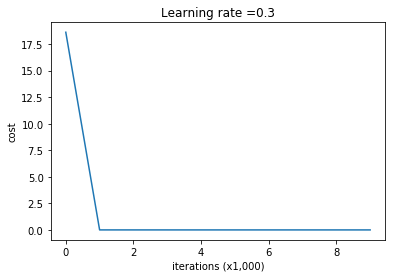

In [15]:
parameters,grads = model(X, Y, lambd=4)

In [16]:
print("On the train set:")
print("=================")
AL, xx = L_model_forward(X, parameters)
te = metrics.r2_score(AL.T, Y)
print("Score: {}%".format(te*100))
print("On the Testing set:")
print("===================")
Y_predicted, xx = L_model_forward(X_test.T, parameters)
tem = metrics.r2_score(Y_predicted.T, y_test)
print("Score: {}%".format(tem*100))

On the train set:
Score: 98.59803918720111%
On the Testing set:
Score: 97.645169072843%


In [82]:
print(y_test[:5].T)
print(Y_predicted[0,:5])

[[ 6.30752898  5.84710542  6.0216837   5.71843276  5.88094215]]
[[ 6.28969568  5.77760666  6.01232121  5.76266762  5.91016458]]


# Conclusion:

##### This system can be effectively used by TED organization to predict the reach of a new video. For example, if a new video is recorded with features like Technology genere, certain duration, particular speaker, particular tags and with particular sentiment and polarity content we can say it will reach certain views after these many days with 97% confidence